In [1]:
import pandas as pd
pd.options.display.max_columns = 999

In [2]:
# data loading
df_price = pd.read_csv("../data/player_price.csv")
df_stats = pd.read_csv("../data/player_stats.csv")

In [3]:
# filter only Real Madrid players
df_stats_real = df_stats[(df_stats["club"]=="Real Madrid") & 
                         (df_stats["revision"] == "Normal") &
                         (df_stats["origin"] == "N\A")]

# merge players stats with players prices
rm = df_stats_real[["player_id"]].merge(df_price, on=['player_id'], how='inner')

# convert timestamp to datetime
rm['Date'] = pd.to_datetime(rm['timestamp'], unit='ms')
rm.drop(["timestamp"], axis=1, inplace=True)

# create new columns extracting month and year
rm['DateMonth'] = rm['Date'].dt.month
rm['DateYear'] = rm['Date'].dt.year
rm['year_month'] = rm['DateYear'].astype(str) + "_" +\
                            rm['DateMonth'].astype(str).apply(lambda x: "0" + x if len(x) == 1 else x)

In [4]:
# get average of each player
rm = rm.groupby(['player_name', 'year_month'])["xbox_price"].mean().reset_index()

# filter the very expensive players
rm_exp_players = rm.loc[rm["xbox_price"] > 100000, "player_name"].unique()

# get year_month unique values for our plot
dates = sorted(rm.year_month.unique())

In [5]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from JSAnimation import IPython_display

import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


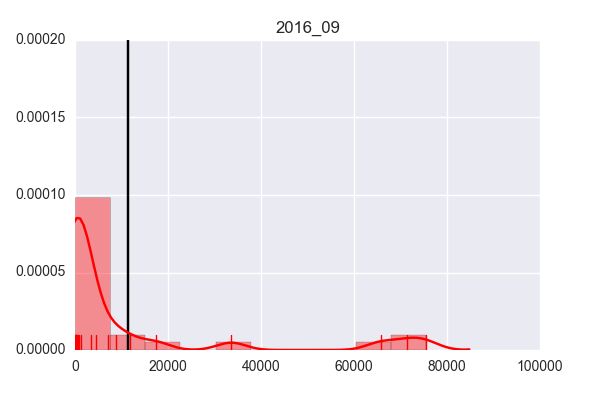
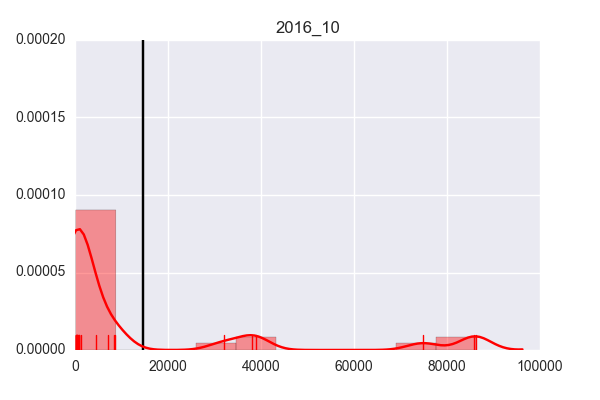
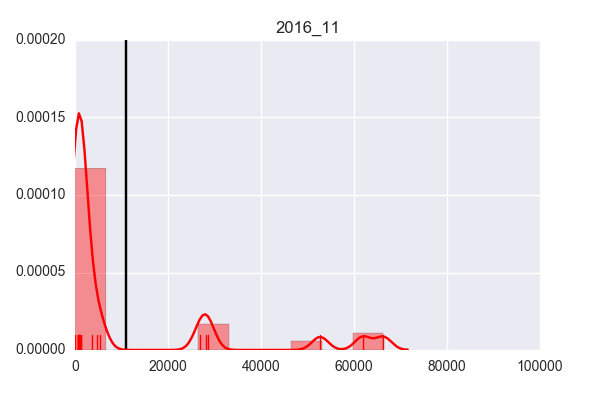
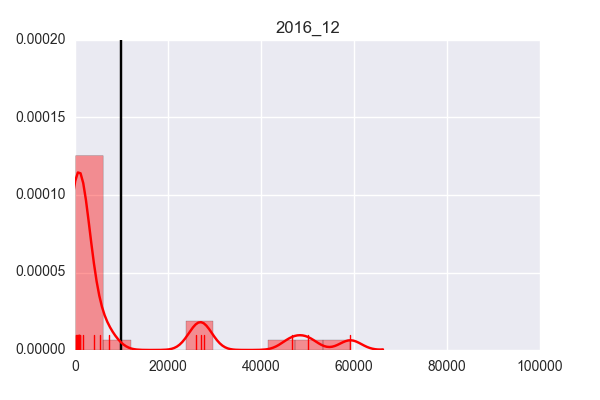
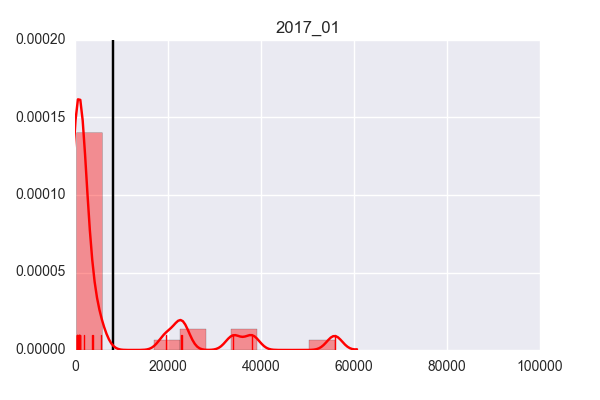
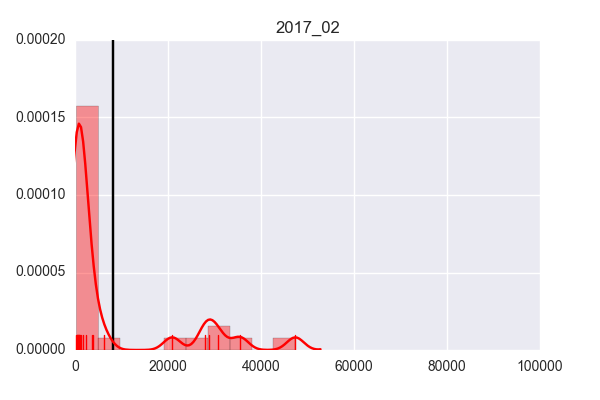
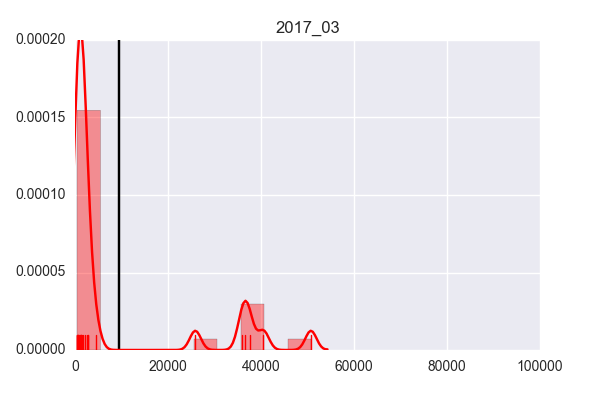
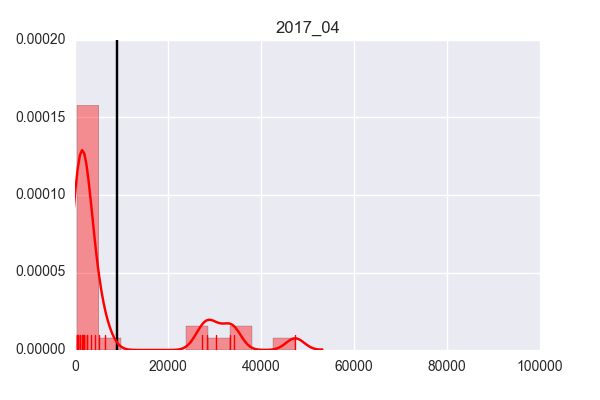
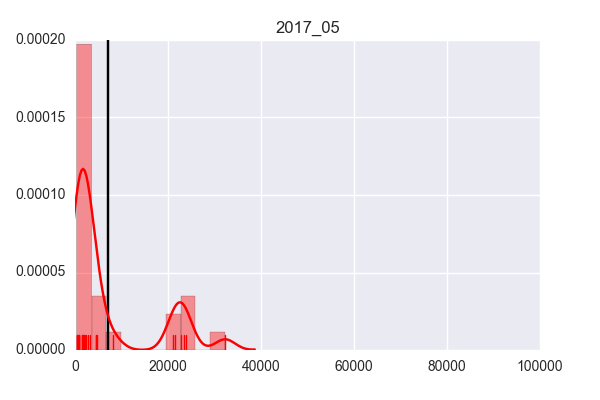
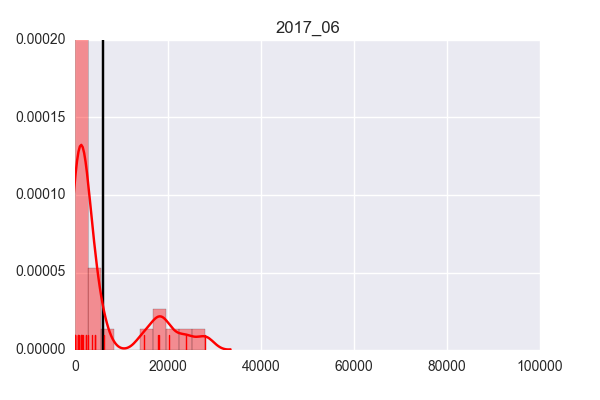

In [6]:
fig, ax = plt.subplots()

def animate(i): 
    data = rm.loc[(rm["year_month"] == i) & (~rm["player_name"].isin(rm_exp_players)), "xbox_price"].values
    ax.clear()
    sns.distplot(data, 10, ax=ax, color="r", rug=True, )
    xmin, xmax = ax.get_ylim()
    ax.vlines(data.mean(), ax.get_ylim()[0], 1)
    ax.set_ylim(0, 0.0002)
    ax.set_xlim(0, 100000)
    ax.set_title(i)

    
animation.FuncAnimation(fig, animate, frames=dates, interval=1000) 